TASK 1

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


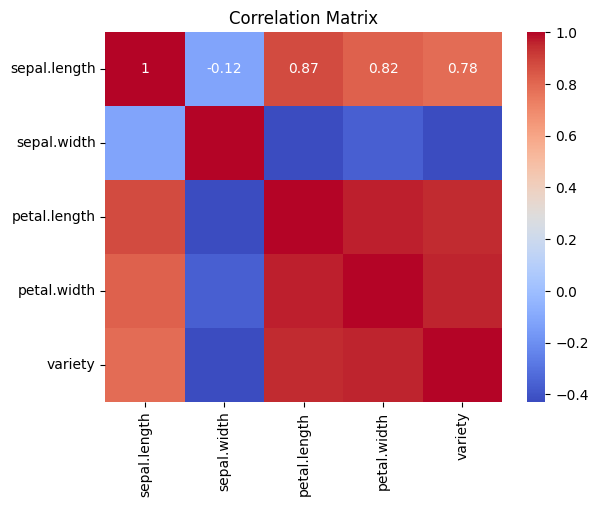

Mutual Information Scores:
              Mutual Information
petal.length            0.994086
petal.width             0.988025
sepal.length            0.478300
sepal.width             0.221665


ValueError: Input X must be non-negative.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import chi2_contingency

df = pd.read_csv('iris.csv')
print(df.head())

le = LabelEncoder()
df['variety'] = le.fit_transform(df['variety'])


correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#  mutual information
X = df.drop('variety', axis=1)
y = df['variety']
mi = mutual_info_classif(X, y, discrete_features=False)

mi_df = pd.DataFrame(mi, index=X.columns, columns=['Mutual Information'])
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information Scores:")
print(mi_df)

# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  chi-squared test
chi_scores, p_values = chi2(X_scaled, y)


chi_df = pd.DataFrame({'Chi-Squared': chi_scores, 'p-value': p_values}, index=X.columns)
chi_df = chi_df.sort_values(by='Chi-Squared', ascending=False)

print("\nChi-Squared Test Scores:")
print(chi_df)


selected_features = mi_df.index[:2].tolist()  
print("\nSelected Features based on Mutual Information:", selected_features)

selected_features_chi2 = chi_df.index[:2].tolist()  
print("Selected Features based on Chi-Squared Test:", selected_features_chi2)


In [ ]:
TASK 2 ( Feature Transformation )

In [27]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

df = pd.read_csv('iris.csv')

#log transformation 
df['sepal.length_log'] = np.log(df['sepal.length'])

# normalization
scaler = MinMaxScaler()
iris_data_normalized = scaler.fit_transform(df.drop('variety', axis=1))

# Convert back to DataFrame
iris_data_normalized = pd.DataFrame(iris_data_normalized, columns=df.columns[:-1])
iris_data_normalized['variety'] = df['variety']

print(iris_data_normalized.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0      0.222222     0.625000      0.067797     0.041667  Setosa
1      0.166667     0.416667      0.067797     0.041667  Setosa
2      0.111111     0.500000      0.050847     0.041667  Setosa
3      0.083333     0.458333      0.084746     0.041667  Setosa
4      0.194444     0.666667      0.067797     0.041667  Setosa


Feature Creation

In [28]:
df = pd.read_csv('iris.csv')

df['sepal.area'] = df['sepal.length'] * df['sepal.width']
df['petal.area'] = df['petal.length'] * df['petal.width']

print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety  sepal.area  \
0           5.1          3.5           1.4          0.2  Setosa       17.85   
1           4.9          3.0           1.4          0.2  Setosa       14.70   
2           4.7          3.2           1.3          0.2  Setosa       15.04   
3           4.6          3.1           1.5          0.2  Setosa       14.26   
4           5.0          3.6           1.4          0.2  Setosa       18.00   

   petal.area  
0        0.28  
1        0.28  
2        0.26  
3        0.30  
4        0.28  


 Polynomial Features


In [29]:

from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('HousingData.csv')
print(df.head())

numerical_features = df.select_dtypes(include=['float64', 'int64'])


numerical_features = numerical_features.fillna(numerical_features.mean())


degree = 2  
poly = PolynomialFeatures(degree)


poly_features = poly.fit_transform(numerical_features)


poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features.columns))


print("Polynomial features:")
print(poly_features_df.head())


First few rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
Polynomial features:
     1     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  ...  \
0  1.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  ...   
1  1.0  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  ...   
2  1.0  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  ...   
3  1.0  0.032

Handling Categorical Features


In [30]:
df = pd.read_csv('AER_credit_card_data.csv')
print(df.head())

  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


In [31]:

categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['card', 'owner', 'selfemp'], dtype='object')


In [32]:
# One-Hot Encoding
data_one_hot_encoded = pd.get_dummies(df, columns=categorical_columns)
print(data_one_hot_encoded.head())


   reports       age  income     share  expenditure  dependents  months  \
0        0  37.66667  4.5200  0.033270   124.983300           3      54   
1        0  33.25000  2.4200  0.005217     9.854167           3      34   
2        0  33.66667  4.5000  0.004156    15.000000           4      58   
3        0  30.50000  2.5400  0.065214   137.869200           0      25   
4        0  32.16667  9.7867  0.067051   546.503300           2      64   

   majorcards  active  card_no  card_yes  owner_no  owner_yes  selfemp_no  \
0           1      12    False      True     False       True        True   
1           1      13    False      True      True      False        True   
2           1       5    False      True     False       True        True   
3           1       7    False      True      True      False        True   
4           1       5    False      True     False       True        True   

   selfemp_yes  
0        False  
1        False  
2        False  
3        False  
4

In [33]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())


   card  reports       age  income     share  expenditure  owner  selfemp  \
0     1        0  37.66667  4.5200  0.033270   124.983300      1        0   
1     1        0  33.25000  2.4200  0.005217     9.854167      0        0   
2     1        0  33.66667  4.5000  0.004156    15.000000      1        0   
3     1        0  30.50000  2.5400  0.065214   137.869200      0        0   
4     1        0  32.16667  9.7867  0.067051   546.503300      1        0   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


In [23]:
!pip install category_encoders


   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 245.8 kB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.9 kB 357.2 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 380.9 kB/s eta 0:00:00


In [25]:

import category_encoders as ce
df = pd.read_csv('AER_credit_card_data.csv')
categorical_columns = ['owner', 'selfemp']
target = 'active'

# target encoding
encoder = ce.TargetEncoder(cols=categorical_columns)
df[categorical_columns] = encoder.fit_transform(df[categorical_columns], df[target])
print(df.head())


  card  reports       age  income     share  expenditure     owner   selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300  8.950086  6.946254   
1  yes        0  33.25000  2.4200  0.005217     9.854167  5.459350  6.946254   
2  yes        0  33.66667  4.5000  0.004156    15.000000  8.950086  6.946254   
3  yes        0  30.50000  2.5400  0.065214   137.869200  5.459350  6.946254   
4  yes        0  32.16667  9.7867  0.067051   546.503300  8.950086  6.946254   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  
